# Classificação de risco com Machine Learning




Neste projeto, será utilizada uma base de dados para classificação de score de crédito, disponível no Kaggle (https://www.kaggle.com/datasets/parisrohan/credit-score-classification), utilizando técnicas de Análise Exploratória de Dados (EDA) e algoritmos de Machine Learning supervisionados.


O objetivo é aplicar e interpretar os resultados obtidos, assim como criar um sistema que gere valor a partir da análise da base de dados.

Nesse projeto será feita: Análise exploratória dos dados, implementação de pipelines de modelos de classificação (Random Forest, XGBoos e LightGBM), usando gridsearch, avaliação dos modelos com escolhas de métricas adequadas e apresentação dos resultados, escolha do melhor modelo e justificativa.


# Inputação e Preparo da Base de Dados





In [ ]:
import numpy as np              # Numerical computing
import pandas as pd             # DataFrames and data analysis

# Data visualization
import matplotlib.pyplot as plt # Basic plotting
import seaborn as sns           # Statistical plots

# Machine Learning models and tools
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier

# Advanced Gradient Boosting libraries
import xgboost as xgb           # XGBoost
import lightgbm as lgb          # LightGBM

import warnings
warnings.filterwarnings('ignore')

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [ ]:
print(train.shape)
print(test.shape)

(100000, 28)
(50000, 27)


In [ ]:
print(train.columns)
print(test.columns)

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')
Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_H

## Sobre aprendizagem supervisionada e rótulos

A base de dados disponível sob o nome de 'test' não possui rótulo. Para fim de geração de um modelo capaz de ajustar os dados, mas que seja generalista é necessário ter certeza que não se dará overfitting, o que é feito confrontando métricas calculadas para o conjunto de treino e de teste. Para fazer essa verificação são necessários rótulos para o grupo de teste (já que esses devem ser comparados com as predições do modelo). Dessa forma trabalharemos apenas com o dataset denominado 'train', que será renomeado para df.

In [ ]:
df = pd.read_csv('train.csv')

In [ ]:
df.head(5)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

As colunas id, costumer id e Name serão removidas, pois essas informações não terão nenhum impacto no modelo (a identificação de um cliente não afeta o seu score de crédito).

In [ ]:
df.drop(columns=['ID', 'Customer_ID', 'Name'], inplace=True)

In [ ]:
df.columns

Index(['Month', 'Age', 'SSN', 'Occupation', 'Annual_Income',
       'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

Para seguir com a análise exploratória devemos tratar as variáveis que não são numéricas. Inicialmente temos o mês, que é ordinal, de forma que é possível substituir o nome de cada mês pelo seu respectivo número no calendário.

In [ ]:
df['Month'].unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August'], dtype=object)

In [ ]:
month_map = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8
}

df['Month'] = df['Month'].map(month_map)

In [ ]:
df['Month'].dtype

dtype('int64')

# Cópia

Vamos salvar um df1 como segurança caso o df seja muito alterado

In [ ]:
df1 = df.copy()

# Idade

A próxima variável é a idade que está identificada como objeto, porém deveria ser um numérica inteira. Vamos investigar o porquê dessa classificação.

In [ ]:
df['Age'].unique()

array(['23', '-500', '28_', ..., '4808_', '2263', '1342'], dtype=object)

In [ ]:
df['Age'].nunique()

1788

In [ ]:
df['Age'].value_counts()

,count
Age,
38,2833
28,2829
31,2806
26,2792
32,2749
...,...
6618,1
3155,1
5063,1


Podemos identificar que há muitos valores impossíveis para essa variável, que provavelmente decorrem de erros de digitação. Vamos identificar quais são estes valores e substituí-los pela mediana, que é uma métrica mais robusta em aplicações com base de dados que contam com muitos outliers.

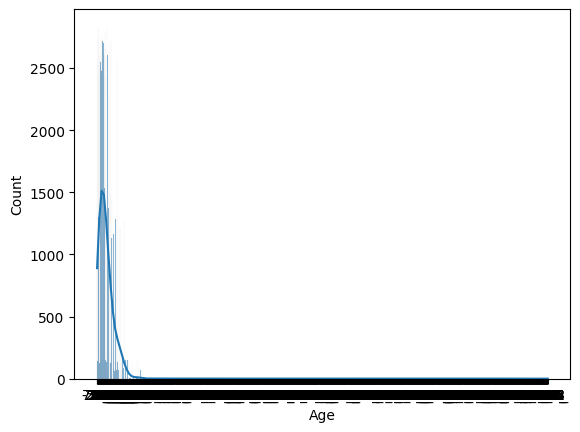

In [ ]:
sns.histplot(df['Age'], kde=True)
plt.show()

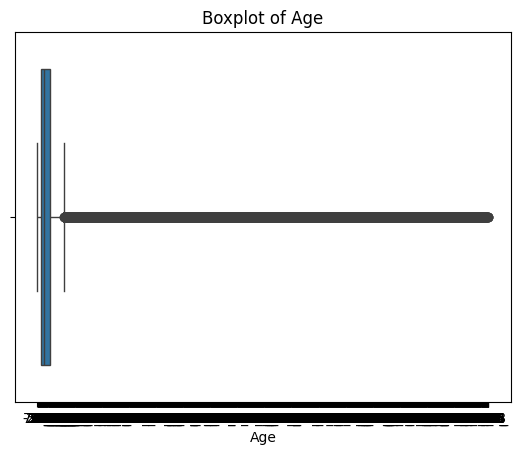

In [ ]:
sns.boxplot(x=df['Age'])
plt.title("Boxplot of Age")
plt.show()

Esse gráfico nos permite ver que existe uma quantidade muito grande de outliers. Vamos substituir esses valores por nan, calcular a mediana e imputá-la no lugar desses valores extremos. Para isso vamos inicialmente substituir -500 por nan, pois é possível que esse número esteja forçando os dados a serem string ao invés de inteiros.

In [ ]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
#caso encontre valores que não podem ser convertidos, o comando os troca por NaN

Para que uma pessoa tenha uma conta bancária nos EUA é preciso que ela tenha no mínimo 18 anos, de forma que valores inferiores a isso para a idade tenham sido erros de digitação. Assim também iremos substituir valores menores que 18 por NaN.

In [ ]:
df.loc[df['Age'] < 18, 'Age'] = np.nan

 A pessoa mais velha do mundo possui 116 anos, então é de se imaginar que, dentro da base de dados, valores para a idade acima de 100 anos também sejam erros de digitação.

In [ ]:
df.loc[df['Age'] > 100, 'Age'] = np.nan

In [ ]:
df['Age'].unique()

array([ 23.,  nan,  28.,  34.,  54.,  55.,  21.,  31.,  33.,  30.,  24.,
        44.,  45.,  40.,  41.,  32.,  35.,  36.,  39.,  37.,  20.,  46.,
        26.,  42.,  19.,  48.,  38.,  43.,  22.,  18.,  27.,  25.,  47.,
        53.,  56.,  29.,  49.,  51.,  50.,  52.,  99., 100.,  95.])

In [ ]:
median_age = df['Age'].median()
df['Age'].fillna(median_age, inplace=True)

In [ ]:
df['Age'].unique()

array([ 23.,  34.,  28.,  54.,  55.,  21.,  31.,  33.,  30.,  24.,  44.,
        45.,  40.,  41.,  32.,  35.,  36.,  39.,  37.,  20.,  46.,  26.,
        42.,  19.,  48.,  38.,  43.,  22.,  18.,  27.,  25.,  47.,  53.,
        56.,  29.,  49.,  51.,  50.,  52.,  99., 100.,  95.])

O SSN é o Social Security Number, também é apenas um identificador do cliente, podendo ser excluído.

In [ ]:
df.drop(columns=['SSN'], inplace=True)

In [ ]:
df.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,1,23.0,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,2,23.0,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,3,34.0,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,4,23.0,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,5,23.0,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [ ]:
df['Payment_Behaviour'].unique()

array(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments', '!@9#%8',
       'High_spent_Large_value_payments'], dtype=object)

Vamos substituir '!@9#%8' pela moda

In [ ]:
mode_value = df['Payment_Behaviour'].mode()[0]
df['Payment_Behaviour'] = df['Payment_Behaviour'].replace('!@9#%8', mode_value)

In [ ]:
df['Payment_Behaviour'].unique()

array(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments',
       'High_spent_Large_value_payments'], dtype=object)

In [ ]:
df2 = df.copy()

In [ ]:
#occupation
df['Occupation'].unique()

array(['Scientist', '_______', 'Teacher', 'Engineer', 'Entrepreneur',
       'Developer', 'Lawyer', 'Media_Manager', 'Doctor', 'Journalist',
       'Manager', 'Accountant', 'Musician', 'Mechanic', 'Writer',
       'Architect'], dtype=object)

In [ ]:
n_ = df['Occupation'].value_counts().get('_______', 0) #quantas vezes ______ aparece no dataset

In [ ]:
porc_ = n_/df.shape[0]
print(porc_)

0.07062


A porcentagem de entradas nulas para o campo Ocupação é pequena (7%) porém ainda é significativa. Poderíamos adotar a estratégia de substituir essas entradas nulas pela moda, porém é de se esperar que haja uma relação direta entre a Ocupação e a Renda Anual. Vamos converter a variável renda anual em numérica e investigar essa relação para ver se é possível substituir os valores em branco a partir da renda anual.

In [ ]:
df['Annual_Income'].unique()

array(['19114.12', '34847.84', '34847.84_', ..., '20002.88', '39628.99',
       '39628.99_'], dtype=object)

In [ ]:
df2 = df.copy()

In [ ]:
df['Annual_Income'] = df['Annual_Income'].str.replace(r'(?<=\d)_', '', regex=True) #remove o _ no final de números

In [ ]:
df['Annual_Income'].unique()

array(['19114.12', '34847.84', '143162.64', ..., '37188.1', '20002.88',
       '39628.99'], dtype=object)

In [ ]:
df['Annual_Income'] = df['Annual_Income'].astype(float)

In [ ]:
df['Occupation'] = df['Occupation'].replace('_______', np.nan)

In [ ]:
df['Income_Category_Labels'] = pd.qcut(
    df['Annual_Income'],
    q=7,
    labels=['Very Low', 'Low', 'Medium Low', 'Medium', 'Medium High', 'High', 'Very High']
)

In [ ]:
occupation_by_income = df.groupby('Income_Category_Labels')['Occupation'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
#agrupa o dataframe pela coluna Income_Category_Labels, sendo que cada grupo tem as linhas que estão dentro de cada range do grupo
#o código então calcula a moda para cada subgrupo de range de renda, e caso haja um empate e tenha mais de uma moda
#o código seleciona apenas a primeira (iloc[0])

In [ ]:
occupation_by_income

,Occupation
Income_Category_Labels,
Very Low,Accountant
Low,Teacher
Medium Low,Lawyer
Medium,Architect
Medium High,Accountant
High,Scientist
Very High,Architect


In [ ]:
def fill_occupation(row):
    if pd.isna(row['Occupation']):
        return occupation_by_income[row['Income_Category_Labels']]
    return row['Occupation']

df['Occupation'] = df.apply(fill_occupation, axis=1)

In [ ]:
df['Occupation'].unique()

array(['Scientist', 'Architect', 'Teacher', 'Engineer', 'Entrepreneur',
       'Lawyer', 'Developer', 'Media_Manager', 'Doctor', 'Journalist',
       'Manager', 'Accountant', 'Musician', 'Mechanic', 'Writer'],
      dtype=object)

In [ ]:
#agora podemos excluir a coluna auxiliar Income_Category_Labels
df.drop(columns=['Income_Category_Labels'], inplace=True)

In [ ]:
df.dtypes

,0
Month,int64
Age,float64
Occupation,object
Annual_Income,float64
Monthly_Inhand_Salary,float64
Num_Bank_Accounts,int64
Num_Credit_Card,int64
Interest_Rate,int64
Num_of_Loan,object
Type_of_Loan,object


In [ ]:
#num of loan
df['Num_of_Loan'].unique()

array(['4', '1', '3', '967', '-100', '0', '0_', '2', '3_', '2_', '7', '5',
       '5_', '6', '8', '8_', '9', '9_', '4_', '7_', '1_', '1464', '6_',
       '622', '352', '472', '1017', '945', '146', '563', '341', '444',
       '720', '1485', '49', '737', '1106', '466', '728', '313', '843',
       '597_', '617', '119', '663', '640', '92_', '1019', '501', '1302',
       '39', '716', '848', '931', '1214', '186', '424', '1001', '1110',
       '1152', '457', '1433', '1187', '52', '1480', '1047', '1035',
       '1347_', '33', '193', '699', '329', '1451', '484', '132', '649',
       '995', '545', '684', '1135', '1094', '1204', '654', '58', '348',
       '614', '1363', '323', '1406', '1348', '430', '153', '1461', '905',
       '1312', '1424', '1154', '95', '1353', '1228', '819', '1006', '795',
       '359', '1209', '590', '696', '1185_', '1465', '911', '1181', '70',
       '816', '1369', '143', '1416', '455', '55', '1096', '1474', '420',
       '1131', '904', '89', '1259', '527', '1241', '449', 

In [ ]:
df['Num_of_Loan'] = df['Num_of_Loan'].str.replace(r'(?<=\d)_', '', regex=True) #remove o _ no final de números

In [ ]:
df['Num_of_Loan'] = df['Num_of_Loan'].astype(int)

In [ ]:
df['Num_of_Loan'] = df['Num_of_Loan'].apply(lambda x: 0 if x < 0 else x)

In [ ]:
#type of loan
df['Type_of_Loan'].unique()

array(['Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
       'Credit-Builder Loan', 'Auto Loan, Auto Loan, and Not Specified',
       ..., 'Home Equity Loan, Auto Loan, Auto Loan, and Auto Loan',
       'Payday Loan, Student Loan, Mortgage Loan, and Not Specified',
       'Personal Loan, Auto Loan, Mortgage Loan, Student Loan, and Student Loan'],
      dtype=object)

In [ ]:
df['Type_of_Loan'].value_counts().iloc[:20]

,count
Type_of_Loan,
Not Specified,1408
Credit-Builder Loan,1280
Personal Loan,1272
Debt Consolidation Loan,1264
Student Loan,1240
Payday Loan,1200
Mortgage Loan,1176
Auto Loan,1152
Home Equity Loan,1136


In [ ]:
#substituir as entradas com mais de um tipo de empréstimo por 'Two or More Types of Loan'
mask = df['Type_of_Loan'].astype(str).str.contains(',')
df.loc[mask, 'Type_of_Loan'] = 'Two or More Types of Loan'

In [ ]:
df['Type_of_Loan'].unique()

array(['Two or More Types of Loan', 'Credit-Builder Loan',
       'Not Specified', nan, 'Debt Consolidation Loan', 'Auto Loan',
       'Home Equity Loan', 'Student Loan', 'Personal Loan', 'Payday Loan',
       'Mortgage Loan'], dtype=object)

In [ ]:
df['Type_of_Loan'] = df['Type_of_Loan'].fillna('Not Specified')

In [ ]:
df['Type_of_Loan'].isnull().sum()

np.int64(0)

In [ ]:
# Num_of_Delayed_Payment	object
df['Num_of_Delayed_Payment'].unique()


array(['7', nan, '4', '8_', '6', '1', '-1', '3_', '0', '8', '5', '3', '9',
       '12', '15', '17', '10', '2', '2_', '11', '14', '20', '22', '13',
       '13_', '14_', '16', '12_', '18', '19', '23', '24', '21', '3318',
       '3083', '22_', '1338', '4_', '26', '11_', '3104', '21_', '25',
       '10_', '183_', '9_', '1106', '834', '19_', '24_', '17_', '23_',
       '2672', '20_', '2008', '-3', '538', '6_', '1_', '16_', '27', '-2',
       '3478', '2420', '15_', '707', '708', '26_', '18_', '3815', '28',
       '5_', '1867', '2250', '1463', '25_', '7_', '4126', '2882', '1941',
       '2655', '2628', '132', '3069', '306', '0_', '3539', '3684', '1823',
       '4128', '1946', '827', '2297', '2566', '904', '182', '929', '3568',
       '2503', '1552', '2812', '1697', '3764', '851', '3905', '923', '88',
       '1668', '3253', '808', '2689', '3858', '642', '3457', '1402',
       '1732', '3154', '847', '3037', '2204', '3103', '1063', '2056',
       '1282', '1841', '2569_', '211', '793', '3484', '4

In [ ]:
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].str.replace(r'(?<=\d)_', '', regex=True)

In [ ]:
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].fillna(0)
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].astype(int)
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].apply(lambda x: 0 if x < 0 else x)

In [ ]:
# Changed_Credit_Limit
df['Changed_Credit_Limit'].value_counts()

,count
Changed_Credit_Limit,
_,2091
8.22,133
11.5,127
11.32,126
7.35,121
...,...
30.16,1
4.710000000000001,1
-4.39,1


In [ ]:
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].str.replace('_', '', regex=False)
df['Changed_Credit_Limit'] = pd.to_numeric(df['Changed_Credit_Limit'], errors='coerce')
median_changed_credit_limit = df['Changed_Credit_Limit'].median()
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].fillna(median_changed_credit_limit)

df['Changed_Credit_Limit'].value_counts()

,count
Changed_Credit_Limit,
9.40,2168
8.22,133
11.50,127
11.32,126
7.35,121
...,...
-4.55,1
-2.75,1
-4.67,1


In [ ]:
#Outstanding_Debt
df['Outstanding_Debt'].unique()

array(['809.98', '605.03', '1303.01', ..., '3571.7_', '3571.7', '502.38'],
      dtype=object)

In [ ]:
df['Outstanding_Debt'] = df['Outstanding_Debt'].str.replace(r'(?<=\d)_', '', regex=True)

In [ ]:
df['Outstanding_Debt'] = df['Outstanding_Debt'].astype(float)

In [ ]:
#Ammount invested Monthly
df['Amount_invested_monthly'].unique()

array(['80.41529543900253', '118.28022162236736', '81.699521264648', ...,
       '24.02847744864441', '251.67258219721603', '167.1638651610451'],
      dtype=object)

In [ ]:

df['Amount_invested_monthly'] = df['Amount_invested_monthly'].replace('__10000__', 10000)
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].astype(float)

In [ ]:
#Monthly_Balance
df['Monthly_Balance'].unique()

array(['312.49408867943663', '284.62916249607184', '331.2098628537912',
       ..., 516.8090832742814, 319.1649785257098, 393.6736955618808],
      dtype=object)

In [ ]:
df['Monthly_Balance'] = df['Monthly_Balance'].str.replace(r'(?<=\d)_', '', regex=True)

In [ ]:
df['Monthly_Balance'] = df['Monthly_Balance'].apply(lambda x: np.nan if isinstance(x, str) else x)
median_value_MB = df['Monthly_Balance'].median()
df['Monthly_Balance'] = df['Monthly_Balance'].fillna(median_value_MB)
df['Monthly_Balance'] = df['Monthly_Balance'].astype(float)

In [ ]:
#Credit History Age
df['Credit_History_Age'].unique()

array(['22 Years and 1 Months', nan, '22 Years and 3 Months',
       '22 Years and 4 Months', '22 Years and 5 Months',
       '22 Years and 6 Months', '22 Years and 7 Months',
       '26 Years and 7 Months', '26 Years and 8 Months',
       '26 Years and 9 Months', '26 Years and 10 Months',
       '26 Years and 11 Months', '27 Years and 0 Months',
       '27 Years and 1 Months', '27 Years and 2 Months',
       '17 Years and 9 Months', '17 Years and 10 Months',
       '17 Years and 11 Months', '18 Years and 1 Months',
       '18 Years and 2 Months', '18 Years and 3 Months',
       '18 Years and 4 Months', '17 Years and 3 Months',
       '17 Years and 4 Months', '17 Years and 5 Months',
       '17 Years and 6 Months', '17 Years and 7 Months',
       '17 Years and 8 Months', '30 Years and 8 Months',
       '30 Years and 9 Months', '30 Years and 10 Months',
       '30 Years and 11 Months', '31 Years and 0 Months',
       '31 Years and 1 Months', '31 Years and 2 Months',
       '31 Years and

In [ ]:
import re

def convert_to_months(value):
    if isinstance(value, str):
        match = re.search(r'(\d+)\s+Years?.*?(\d+)\s+Months?', value)
        if match:
            years = int(match.group(1))
            months = int(match.group(2))
            return years * 12 + months
    return np.nan  # return NaN for invalid/missing formats

df['Credit_History_Age'] = df['Credit_History_Age'].apply(convert_to_months)

In [ ]:
median_value_CHA = df['Credit_History_Age'].median()
df['Credit_History_Age'] = df['Credit_History_Age'].fillna(median_value_CHA)


In [ ]:
df['Credit_History_Age'] = df['Credit_History_Age'].astype(int)

In [ ]:
#Credit_Mix
df['Credit_Mix'].unique()
df['Credit_Mix'].value_counts()

,count
Credit_Mix,
Standard,36479
Good,24337
_,20195
Bad,18989


In [ ]:
mapping = {'Bad': 1, 'Standard': 2, 'Good': 3}
df['Credit_Mix'] = df['Credit_Mix'].replace(mapping)

In [ ]:
df['Credit_Mix'] = df['Credit_Mix'].replace('_', np.nan)

Credit_Mix e Credit_Score parecem ser muito parecidos, vamos investigar melhor essa aparente similaridade

In [ ]:
df['Credit_Score'].unique()

array(['Good', 'Standard', 'Poor'], dtype=object)

In [ ]:
score_map = {
    'Poor': 1,
    'Standard': 2,
    'Good': 3
}

In [ ]:
df['Credit_Score_Mapped'] = df['Credit_Score'].map(score_map)

# Now compare the two
df['Is_Aligned'] = df['Credit_Mix'] == df['Credit_Score_Mapped']

In [ ]:
df['Is_Aligned'].value_counts()

,count
Is_Aligned,
False,50139
True,49861


Aparentemente as variáveis Credit_Mix e Credit_Score pareciam bastante similares, por isso testamos para ver quantas correspondências essas apresentam. Verificamos que apenas metade dos valores se correspondem, de forma que vamos manter Credit_Score.

In [ ]:
df.dtypes

,0
Month,int64
Age,float64
Occupation,object
Annual_Income,float64
Monthly_Inhand_Salary,float64
Num_Bank_Accounts,int64
Num_Credit_Card,int64
Interest_Rate,int64
Num_of_Loan,int64
Type_of_Loan,object


In [ ]:
correlation1 = df[['Outstanding_Debt', 'Credit_Mix']].corr(method='pearson')
print(correlation1)


                  Outstanding_Debt  Credit_Mix
Outstanding_Debt          1.000000   -0.689485
Credit_Mix               -0.689485    1.000000
                        Num_of_Delayed_Payment  Credit_Mix
Num_of_Delayed_Payment                1.000000   -0.016942
Credit_Mix                           -0.016942    1.000000


Como existe uma correlação de quase 70% entre Outstanding Debt e Credit Mix, vamos usar essa variável como base para inputar os valores faltantes.

In [ ]:
df['Debt_Tertile'] = pd.qcut(df['Outstanding_Debt'], q=3, labels=['Low', 'Medium', 'High'])
index_by_debt = df.groupby('Debt_Tertile')['Credit_Mix'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
def fill_credit_index(row):
    if pd.isna(row['Credit_Mix']):
        return index_by_debt[row['Debt_Tertile']]
    return row['Credit_Mix']

df['Credit_Mix'] = df.apply(fill_credit_index, axis=1)
df.drop(columns=['Debt_Tertile'], inplace=True)

In [ ]:
df['Credit_Mix'].unique()

array([2., 3., 1.])

In [ ]:
#Payment of Minimal ammount
df['Payment_Behaviour'].unique()

array(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments',
       'High_spent_Large_value_payments'], dtype=object)

In [ ]:
#payment behaviour
df['Payment_Behaviour'].unique()

array(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments',
       'High_spent_Large_value_payments'], dtype=object)

In [ ]:
#payment od minimal ammount
df['Payment_of_Min_Amount'].value_counts()

,count
Payment_of_Min_Amount,
Yes,52326
No,35667
NM,12007


Para inputar dados para essa variável vamos utilizar o perfil de comportamento, se um cliente faz pagamentos de pequeno valor vamos inputar um valor correspondente a sim na coluna de pagamento mínimo.

In [ ]:
conditions = df['Payment_of_Min_Amount'] == 'NM'

df.loc[
    conditions & df['Payment_Behaviour'].isin(['High_spent_Small_value_payments', 'Low_spent_Small_value_payments']),
    'Payment_of_Min_Amount'
] = 'Yes'

df.loc[
    conditions & ~df['Payment_Behaviour'].isin(['High_spent_Small_value_payments', 'Low_spent_Small_value_payments']),
    'Payment_of_Min_Amount'
] = 'No'

In [ ]:
df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].replace({'Yes': 1, 'No': 0})
df['Payment_of_Min_Amount'].value_counts()

,count
Payment_of_Min_Amount,
1,57620
0,42380


In [ ]:
#Monthly Salary
porc_nan_MIS = (df['Monthly_Inhand_Salary'].isnull().sum()/df.shape[0])*100
porc_nan_MIS


np.float64(15.001999999999999)

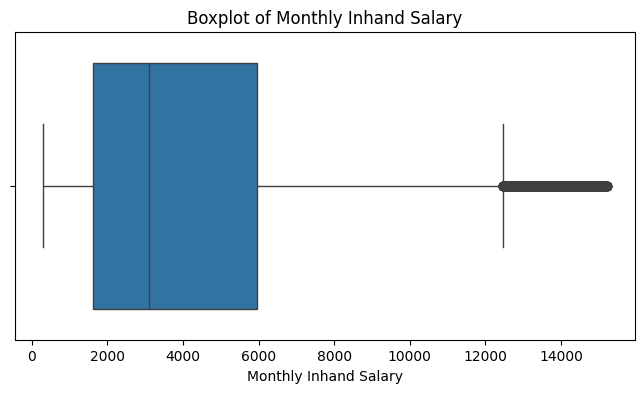

In [ ]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['Monthly_Inhand_Salary'])
plt.title('Boxplot of Monthly Inhand Salary')
plt.xlabel('Monthly Inhand Salary')
plt.show()


Existem valores altos, porém estes são condizentes com algumas ocupações que tem remuneração extremamente elevada, de forma que iremos manter todos os valores e inputar valores da mediana.

In [ ]:
median_salary = df['Monthly_Inhand_Salary'].median()
df['Monthly_Inhand_Salary'].fillna(median_salary, inplace=True)

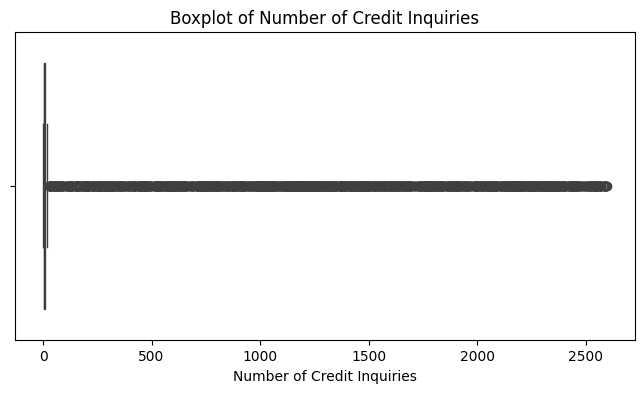

In [ ]:
#Num_Credit_Inquiries
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['Num_Credit_Inquiries'])
plt.title('Boxplot of Number of Credit Inquiries')
plt.xlabel('Number of Credit Inquiries')
plt.show()

Apesar de um formato não usual, é possível entender que essa variável tem um range grande de dados e não possui outliers.

In [ ]:
numeric_df = df.select_dtypes(include='number')

In [ ]:
correlations = numeric_df.corr()['Num_Credit_Inquiries'].sort_values(ascending=False)
print(correlations)

Num_Credit_Inquiries        1.000000
Payment_of_Min_Amount       0.013890
Outstanding_Debt            0.013387
Delay_from_due_date         0.011508
Changed_Credit_Limit        0.006454
Month                       0.004879
Annual_Income               0.003153
Num_of_Delayed_Payment      0.002554
Credit_Utilization_Ratio    0.000145
Num_of_Loan                -0.000387
Amount_invested_monthly    -0.000614
Interest_Rate              -0.001681
Num_Bank_Accounts          -0.001683
Num_Credit_Card            -0.003479
Age                        -0.005009
Total_EMI_per_month        -0.007031
Monthly_Inhand_Salary      -0.007977
Credit_Score_Mapped        -0.011235
Credit_History_Age         -0.013715
Credit_Mix                 -0.014766
Monthly_Balance                  NaN
Name: Num_Credit_Inquiries, dtype: float64


In [ ]:
porc_nan_NIC = (df['Num_Credit_Inquiries'].isnull().sum()/df.shape[0])*100
porc_nan_NIC

np.float64(1.965)

Porém essa variável também não possui uma correlação alta com nenhuma outra, de forma que não podemos basear seu valor de imputação em dados vindos de outras colunas. Como a porcentagem de valores faltantes é bastante baixa (2%) iremos usar a mediana para completar a base.

In [ ]:
median_salary = df['Num_Credit_Inquiries'].median()
df['Num_Credit_Inquiries'].fillna(median_salary, inplace=True)

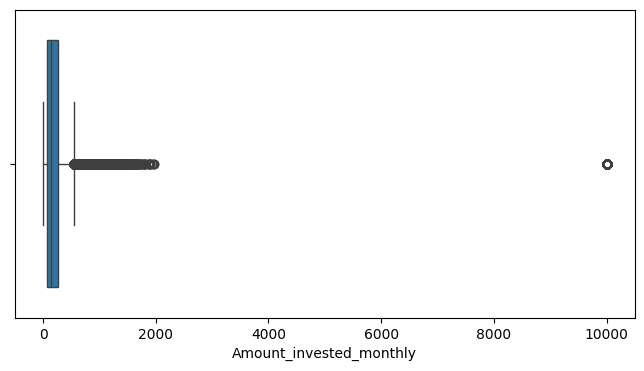

In [ ]:
#Amount_invested_monthly
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['Amount_invested_monthly'])

plt.show()

Aqui pode-se identificar claramente um outlier, que será removido e substituído pela mediana como os demais valores faltantes.

In [ ]:
df.loc[df['Amount_invested_monthly'] > 3000, 'Amount_invested_monthly'] = np.nan
median_value = df['Amount_invested_monthly'].median()
df['Amount_invested_monthly'].fillna(median_value, inplace=True)

In [ ]:
df.isnull().sum()

,0
Month,0
Age,0
Occupation,0
Annual_Income,0
Monthly_Inhand_Salary,0
Num_Bank_Accounts,0
Num_Credit_Card,0
Interest_Rate,0
Num_of_Loan,0
Type_of_Loan,0


In [ ]:
porc_nan_MB = (df['Monthly_Balance'].isnull().sum()/df.shape[0])*100
porc_nan_MB

np.float64(100.0)

Não existem entradas para a variável Monthly Balance, por isso essa colunas será apenas excluída!

Também serão excluídas as colunas auxiliares Credit_Score_Mapped e Is_Aligned.


In [ ]:
df.drop(columns=['Monthly_Balance', 'Is_Aligned', 'Credit_Score_Mapped'], inplace=True)

In [ ]:
df.head(5)

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Credit_Score
0,1,23.0,Scientist,19114.12,1824.843333,3,4,3,4,Two or More Types of Loan,...,4.0,2.0,809.98,26.822620,265,0,49.574949,80.415295,High_spent_Small_value_payments,Good
1,2,23.0,Scientist,19114.12,3093.745000,3,4,3,4,Two or More Types of Loan,...,4.0,3.0,809.98,31.944960,219,0,49.574949,118.280222,Low_spent_Large_value_payments,Good
2,3,34.0,Scientist,19114.12,3093.745000,3,4,3,4,Two or More Types of Loan,...,4.0,3.0,809.98,28.609352,267,0,49.574949,81.699521,Low_spent_Medium_value_payments,Good
3,4,23.0,Scientist,19114.12,3093.745000,3,4,3,4,Two or More Types of Loan,...,4.0,3.0,809.98,31.377862,268,0,49.574949,199.458074,Low_spent_Small_value_payments,Good
4,5,23.0,Scientist,19114.12,1824.843333,3,4,3,4,Two or More Types of Loan,...,4.0,3.0,809.98,24.797347,269,0,49.574949,41.420153,High_spent_Medium_value_payments,Good


# 1. Análise Exploratória

Vamos começar verificando o comportamento das variáveis categóricas presentes na base de dados.

In [ ]:
cat_cols = df.select_dtypes(include=['object', 'category']).drop(columns=['Credit_Score'], errors='ignore').columns
cat_cols

Index(['Occupation', 'Type_of_Loan', 'Payment_Behaviour'], dtype='object')

In [ ]:
 for col in cat_cols:
        print(f'\n🔹 Analyzing: {col}')
        print(df[col].value_counts(dropna=False))


🔹 Analyzing: Occupation
Occupation
Architect        8350
Accountant       8290
Lawyer           7628
Scientist        7274
Teacher          7235
Engineer         6350
Mechanic         6291
Developer        6235
Media_Manager    6232
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: count, dtype: int64

🔹 Analyzing: Type_of_Loan
Type_of_Loan
Two or More Types of Loan    77464
Not Specified                12816
Credit-Builder Loan           1280
Personal Loan                 1272
Debt Consolidation Loan       1264
Student Loan                  1240
Payday Loan                   1200
Mortgage Loan                 1176
Auto Loan                     1152
Home Equity Loan              1136
Name: count, dtype: int64

🔹 Analyzing: Payment_Behaviour
Payment_Behaviour
Low_spent_Small_value_payments      33113
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large

Algo interessante de observar é o quanto essa base apresenta valores bem distribuídos em relação a diferentes categorias. Por exemplo, diversas profissões são incluídas e todas elas aparecem de forma relativamente proporcional. Há uma predominância de pessoas que possuem dois ou mais tipos de créditos, mas no que se refere aos tipo de créditos individuais vê-se que há números de adesões parecidos para todos eles. Em relação ao comportamento de pagamento pessoas que tem baixo consumo e fazem pagamentos pequenos represenam o maior grupo.

In [ ]:
def analyze_categoricals(df, target):
    cat_cols = df.select_dtypes(include=['object', 'category']).columns
    cat_cols = [col for col in cat_cols if col != target]  # exclude target if it's categorical

    for col in cat_cols:

        # Grouped summary of the target by category
        if pd.api.types.is_numeric_dtype(df[target]):
            print(df.groupby(col)[target].mean().sort_values(ascending=False))

        # Plot distribution of the target by category
        plt.figure(figsize=(8, 4))
        sns.boxplot(data=df, x=col, y=target)
        plt.title(f'{target} by {col}')
        plt.xticks(rotation=55)
        plt.tight_layout()
        plt.show()


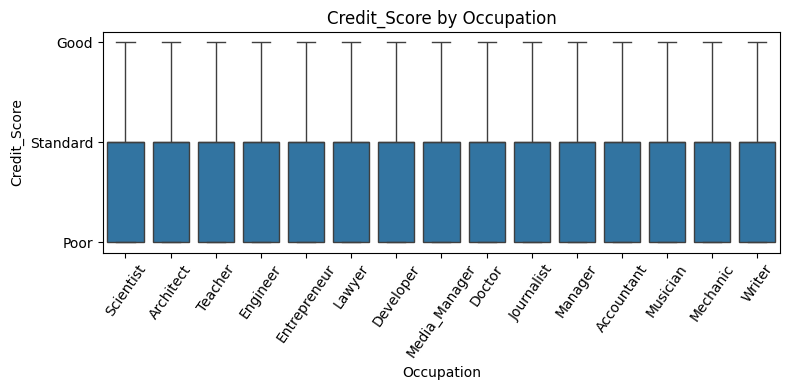

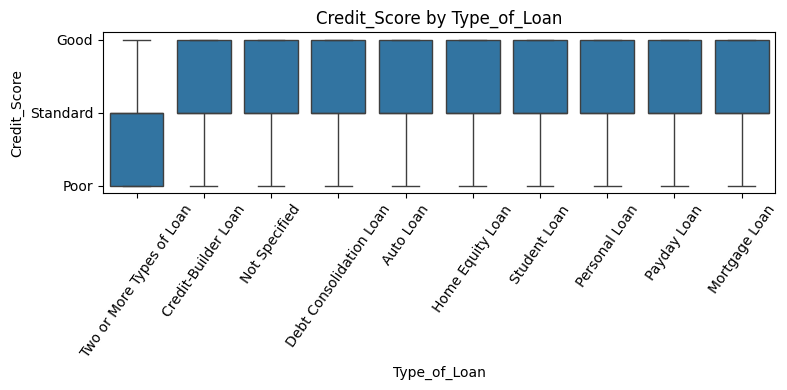

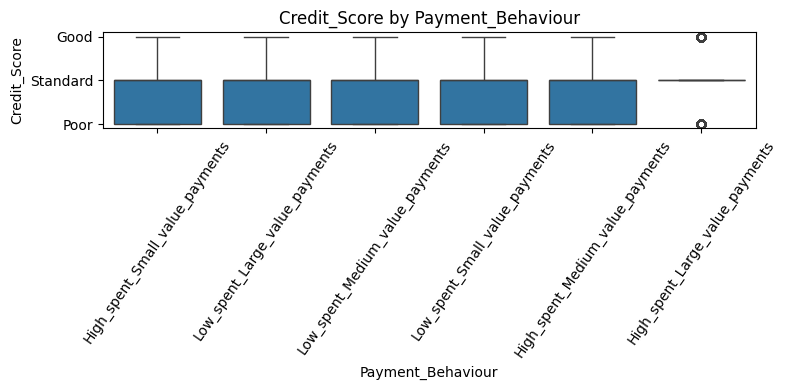

In [ ]:
analyze_categoricals(df, 'Credit_Score')

Agora vamos analisar as variáveis numéricas. Vamos começar vendo suas métricas principais, suas distribuições e removendo valores extremos. (para a variável renda anual os valores extremos serão mantidos, pois é possível que isso represente um grupo real de clientes)

In [ ]:
num_cols = df.select_dtypes(include='number').columns

In [ ]:
df[num_cols].describe()

,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly
count,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,4.500000,34.370670,1.764157e+05,4029.084964,17.091280,22.47443,72.466040,6.885960,21.068780,28.768750,10.368345,27.326780,1.986700,1426.220376,32.285173,220.997160,0.576200,1403.118217,189.690637
std,2.291299,9.440642,1.429618e+06,2961.363540,117.404834,129.05741,466.422621,59.150621,14.860104,218.116171,6.719627,191.293766,0.707014,1155.129026,5.116875,95.133546,0.494162,8306.041270,191.527772
min,1.000000,18.000000,7.005930e+03,303.645417,-1.000000,0.00000,1.000000,0.000000,-5.000000,0.000000,-6.490000,0.000000,1.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.000000
25%,2.750000,27.000000,1.945750e+04,1792.084167,3.000000,4.00000,8.000000,1.000000,10.000000,8.000000,5.420000,3.000000,1.000000,566.072500,28.052567,154.000000,0.000000,30.306660,77.017414
50%,4.500000,34.000000,3.757861e+04,3093.745000,6.000000,5.00000,13.000000,3.000000,18.000000,13.000000,9.400000,6.000000,2.000000,1166.155000,32.305784,219.000000,1.000000,69.249473,128.954538
75%,6.250000,41.000000,7.279092e+04,5371.525000,7.000000,7.00000,20.000000,5.000000,28.000000,18.000000,14.660000,9.000000,2.000000,1945.962500,36.496663,292.000000,1.000000,161.224249,220.039055
max,8.000000,100.000000,2.419806e+07,15204.633333,1798.000000,1499.00000,5797.000000,1496.000000,67.000000,4397.000000,36.970000,2597.000000,3.000000,4998.070000,50.000000,404.000000,1.000000,82331.000000,1977.326102


In [ ]:
df3 = df.copy()

In [ ]:
cols_remove_outs = ['Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Num_of_Delayed_Payment', 'Total_EMI_per_month', 'Num_Credit_Inquiries']

In [ ]:
for col in cols_remove_outs:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 5 * IQR
    median = df[col].median()

    # Replace outliers with the median
    df[col] = df[col].apply(lambda x: median if x > upper_bound else x)

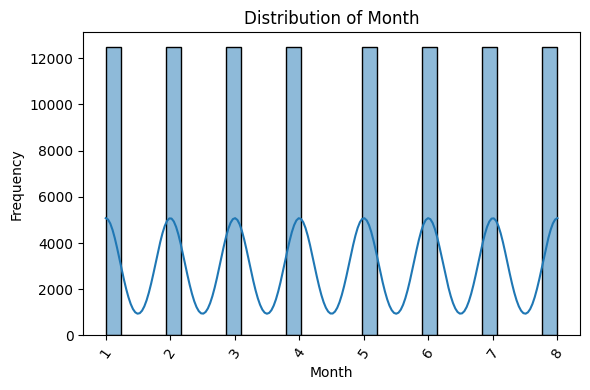

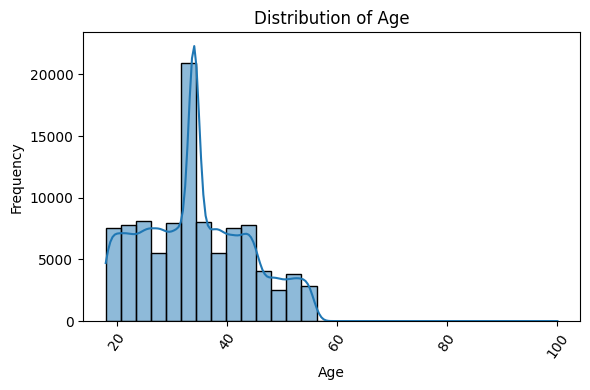

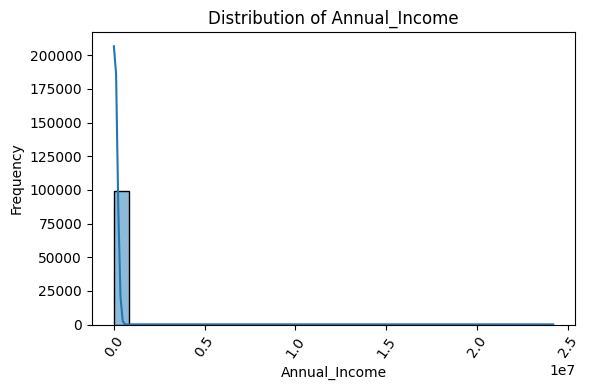

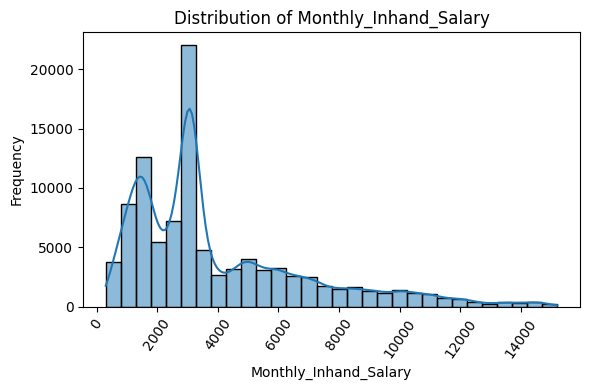

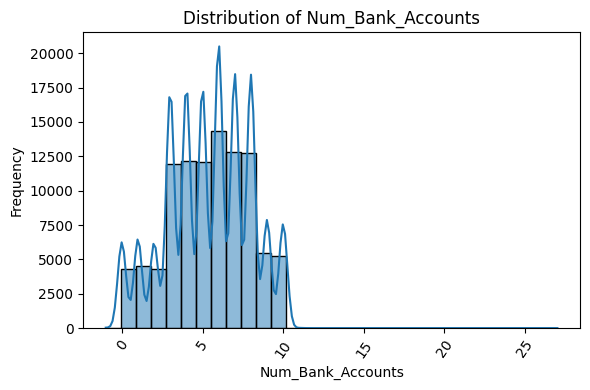

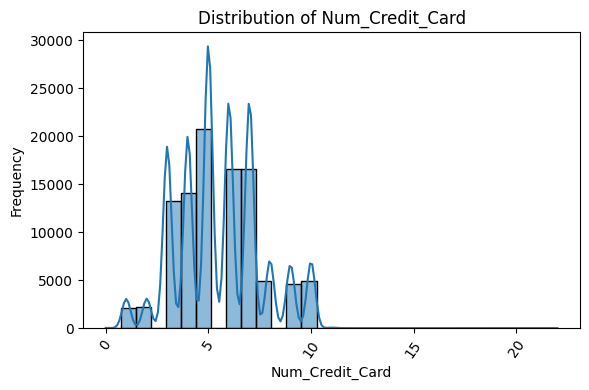

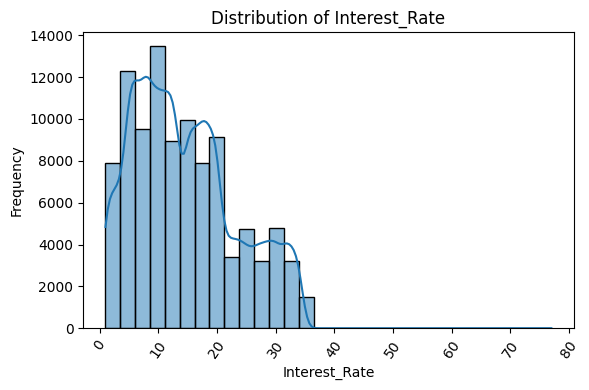

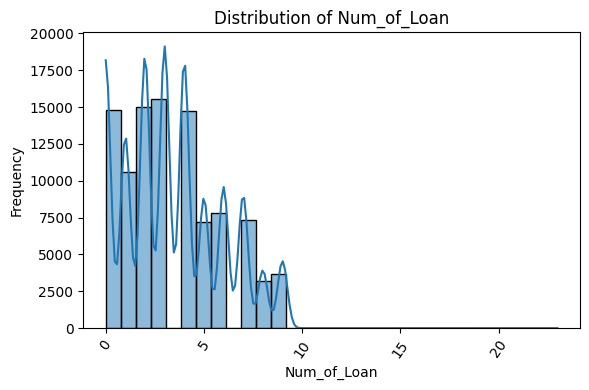

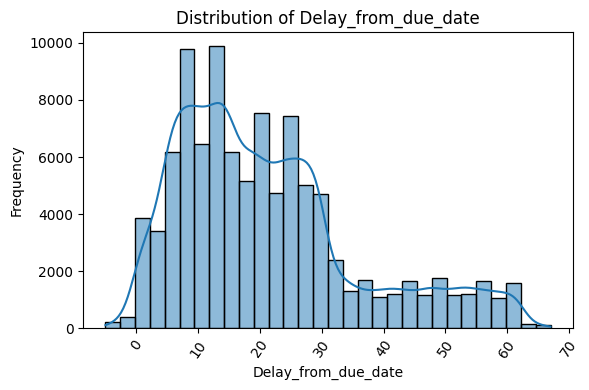

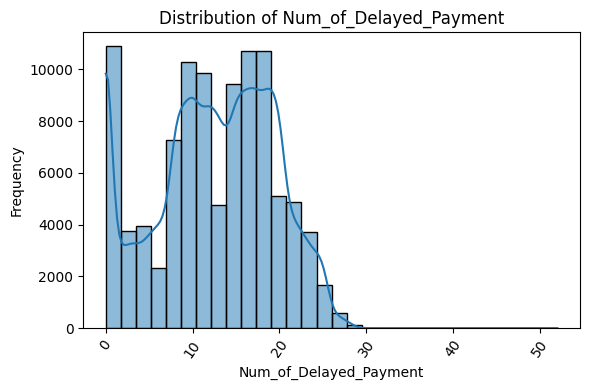

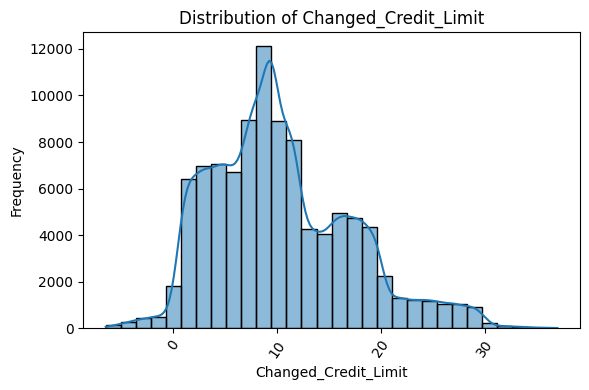

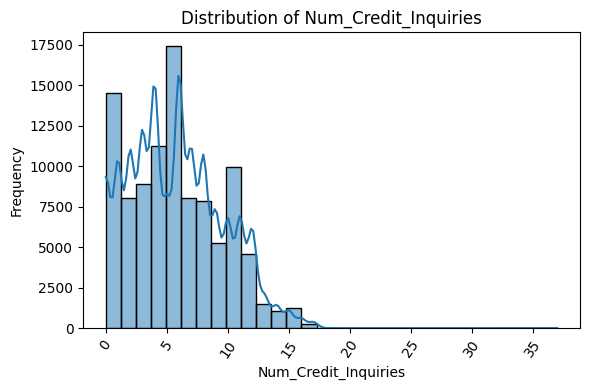

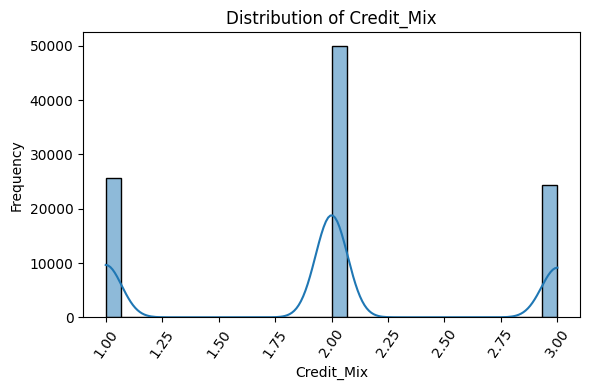

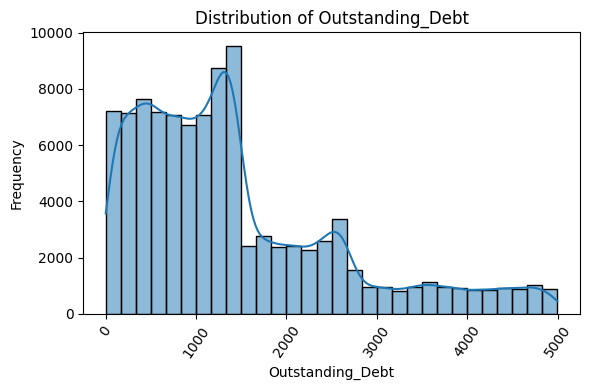

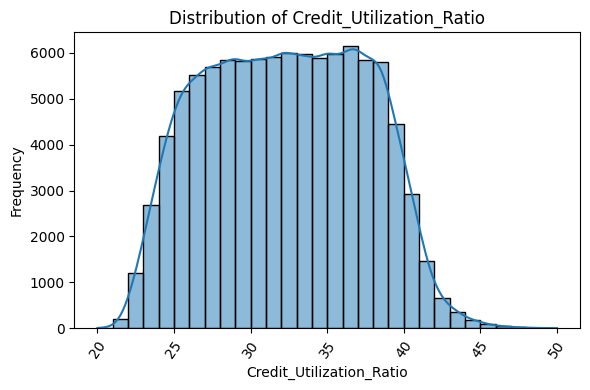

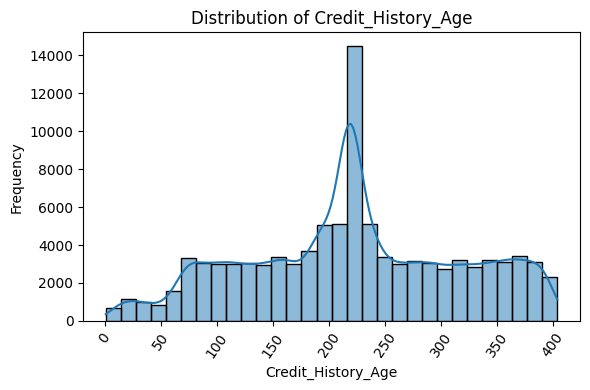

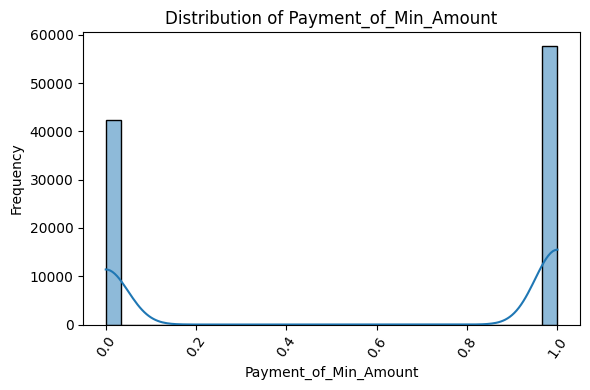

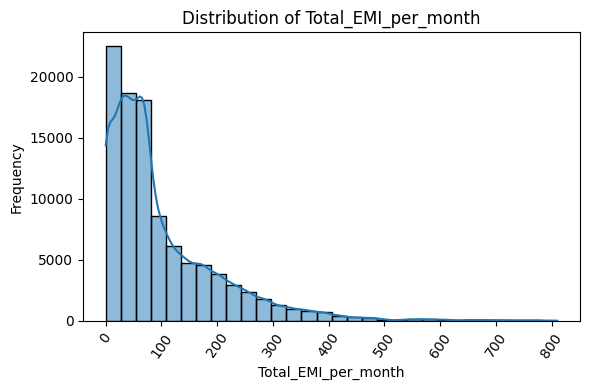

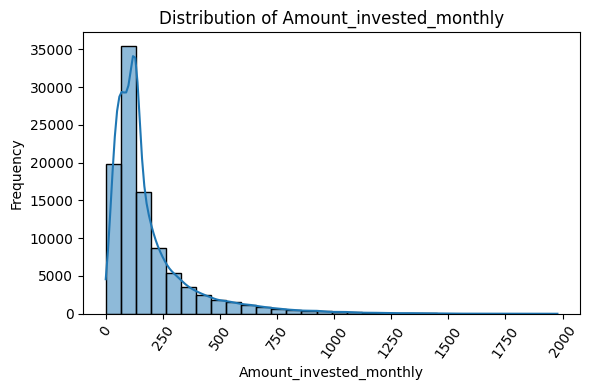

In [ ]:
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.xticks(rotation=55)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

Agora vamos ver como essas variáveis se relacionam entre si.

---



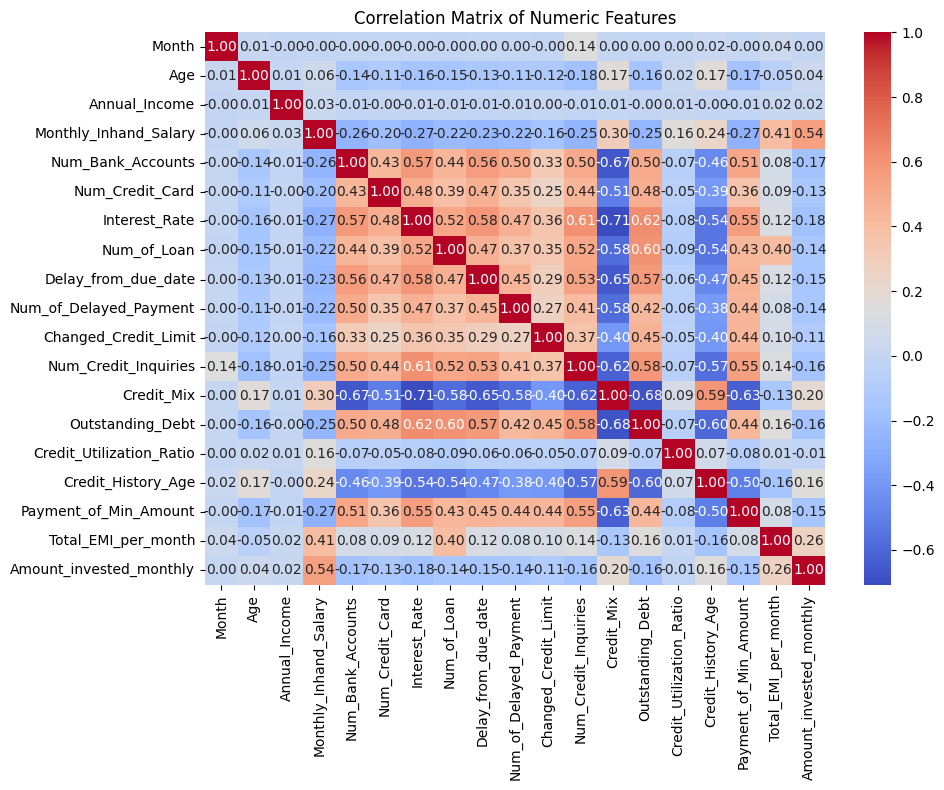

In [ ]:
corr = df[num_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numeric Features')
plt.tight_layout()
plt.show()

É interessante notar como as relações entre outras variáveis com o Credit_Mix e com o Payment_of_Min_Amount são praticamente invertidas, denotando que quanto mais uma pessoa possui cartões de crédito, contas, empréstimos, atrasos em pagamentos e débito, pior será se Credit_Mix, mas maior será a probabilidade dessa pessoa realizar apenas o pagamento mínimo do(s) seu(s) cartão (ões) de crédito.

# 2. Implementação de Modelos de Classificação

Antes de implementar o modelos vamos aplicar a técnica de One-hot Encoding para as variáveis categóricas restantes, além de utilizar o Robust Scaler

In [ ]:
X = df.drop(columns=['Credit_Score'])
y = df['Credit_Score']

In [ ]:
X_encoded = pd.get_dummies(X, drop_first=True)

O mês é uma variável que não terá importância no modelo, por isso iremos removê-lo.

In [ ]:
X_encoded.drop(columns=['Month'], inplace=True)

Agora vamos aplicar o Robust Scaler

In [ ]:
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split

# Split your data first
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.25, random_state=42)

# Initialize scaler
scaler = RobustScaler()

# Fit only on training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform test data using the same scaler
X_test_scaled = scaler.transform(X_test)

## Random Forest

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


pipeline = Pipeline([
    ('rf', RandomForestClassifier(random_state=42))
])

In [ ]:
param_grid = {
    'rf__n_estimators': [50, 10],
    'rf__max_depth': [None, 5, 10],
#    'rf__min_samples_split': [2, 5],
    'rf__min_samples_leaf': [2]
}

In [ ]:
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    #verbose=1
)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('rf',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'rf__max_depth': [None, 5, 10],
                         'rf__min_samples_leaf': [2],
                         'rf__n_estimators': [50, 10]},
             scoring='accuracy')

In [ ]:
print("Best Parameters:", grid_search.best_params_)

best_model = grid_search.best_estimator_

# Predict and evaluate
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

Best Parameters: {'rf__max_depth': None, 'rf__min_samples_leaf': 2, 'rf__n_estimators': 50}
              precision    recall  f1-score   support

        Good       0.73      0.69      0.71      4422
        Poor       0.78      0.78      0.78      7313
    Standard       0.79      0.81      0.80     13265

    accuracy                           0.78     25000
   macro avg       0.77      0.76      0.76     25000
weighted avg       0.78      0.78      0.78     25000



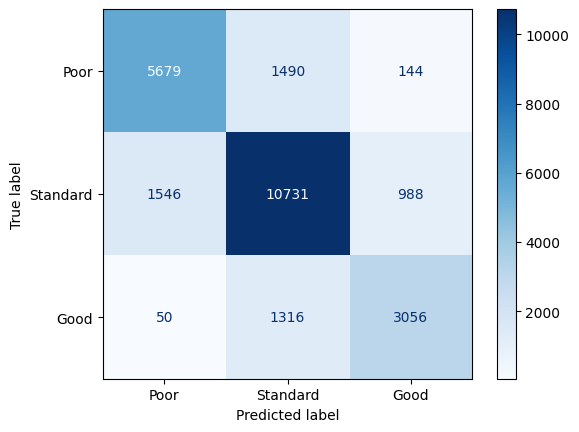

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels=['Poor', 'Standard', 'Good'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Poor', 'Standard', 'Good'])
disp.plot(cmap='Blues')

## XGBoost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
label_map = {'Poor': 0, 'Standard': 1, 'Good': 2}

y_train = y_train.map(label_map)
y_test = y_test.map(label_map)

In [ ]:
pipeline = Pipeline([
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42))
])

In [ ]:
param_grid = {
    'xgb__n_estimators': [50, 100],
    'xgb__max_depth': [3, 5, 7],
    'xgb__learning_rate': [0.01, 0.1],
#    'xgb__subsample': [0.8, 1.0],
#    'xgb__colsample_bytree': [0.8, 1.0]
}

In [ ]:
grid_search = GridSearchCV(
    pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='recall_macro',  # or use 'recall_macro', 'accuracy', etc.
    n_jobs=-1,
    verbose=1
)

In [ ]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('xgb',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      device=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric='mlogloss',
                                                      feature_types=None,
                                                      gamma=None,
                                                      grow_policy=None,
                                                      importance_type=None,
                                                      interaction_constra...
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=42, ...))]),
             n_jobs=-1,
             param_grid={'xgb__learning_rate': [0.01, 0.1],
                         'xgb__max_depth': [3, 5, 7],
                         'xgb__n_estimators': [50, 100]},
             scoring='recall_macro', verbose=1)

In [ ]:
print("Best Parameters:", grid_search.best_params_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print(classification_report(y_test, y_pred, target_names=['Poor', 'Standard', 'Good']))

Best Parameters: {'xgb__learning_rate': 0.1, 'xgb__max_depth': 7, 'xgb__n_estimators': 100}
              precision    recall  f1-score   support

        Poor       0.75      0.68      0.71      7313
    Standard       0.75      0.78      0.76     13265
        Good       0.62      0.66      0.64      4422

    accuracy                           0.73     25000
   macro avg       0.71      0.71      0.71     25000
weighted avg       0.73      0.73      0.73     25000



# LightGBM

In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
pipeline = Pipeline([
    ('lgb', LGBMClassifier(objective='multiclass', num_class=3, random_state=42))
])

In [ ]:
param_grid = {
    'lgb__n_estimators': [100, 200],
    'lgb__max_depth': [3, 5, 7],
    'lgb__learning_rate': [0.05, 0.1],
    'lgb__num_leaves': [15, 31, 63]
}

In [ ]:
grid_search = GridSearchCV(
    pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='f1_macro',  # or 'recall_macro', etc.
    verbose=1,
    n_jobs=-1
)

In [ ]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010295 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2333
[LightGBM] [Info] Number of data points in the train set: 75000, number of used features: 46
[LightGBM] [Info] Start training from score -1.240867
[LightGBM] [Info] Start training from score -0.630886
[LightGBM] [Info] Start training from score -1.721786
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('lgb',
                                        LGBMClassifier(num_class=3,
                                                       objective='multiclass',
                                                       random_state=42))]),
             n_jobs=-1,
             param_grid={'lgb__learning_rate': [0.05, 0.1],
                         'lgb__max_depth': [3, 5, 7],
                         'lgb__n_estimators': [100, 200],
                         'lgb__num_leaves': [15, 31, 63]},
             scoring='f1_macro', verbose=1)

In [ ]:
print("Best Parameters:", grid_search.best_params_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print(classification_report(y_test, y_pred, target_names=['Poor', 'Standard', 'Good']))

Best Parameters: {'lgb__learning_rate': 0.1, 'lgb__max_depth': 7, 'lgb__n_estimators': 200, 'lgb__num_leaves': 63}
              precision    recall  f1-score   support

        Poor       0.76      0.73      0.75      7313
    Standard       0.78      0.79      0.78     13265
        Good       0.68      0.69      0.68      4422

    accuracy                           0.75     25000
   macro avg       0.74      0.74      0.74     25000
weighted avg       0.75      0.75      0.75     25000



### **Random Forest** é um modelo de mais fácil ajuste já que possui um número menor de hiperparâmetros, o que foi a possível causa deste ter apresentado um valor superior para as métricas de performance do modelo


Utilizar o Grid Search com um grande número de parâmetros incorre em um elevado custo computacional com o consequente aumento do tempo de execução. Devido à essa limitação não foi possível testar mais parâmetros e fazer um ajuste melhor dos outros modelos, que, possivelmente, com um ajuste mais cauteloso, resultariam em métricas ainda mais expressivas.

# 3. Qual a métrica mais adequada?
A métrica Recall da classe Poor seria a mais indicada de nos atentarmos para o caso de querermos corretamente prever quais são os clientes que teriam um Score ruim (poor), isso evitaria, por exemplo, de o banco fornecesse crédito para maus pagadores, reduzindo problemas de inadimplência. Assim tivemos os seguintes resultados de recall da classe poor para os três modelos utilizados


1.   Random Forest = 0.78
2.   XGBoost = 0.68
3.   LightGBM = 0.73

Devido a limitações de tempo o fino ajuste de hiperparâmetros dos modelos não foi feito de forma tão minuciosa, talvez por isso o Random Forest tenha se destacado, já que possui um número menor de hiperparâmetros

# 4.  Como o modelo pode ser usado em decisões financeira?

Aplicação do modelo em decisões financeiras
A utilização do modelo em um ambiente real permite que a instituição financeira melhore significativamente sua tomada de decisão. Entre os principais benefícios estão:

Maior assertividade na concessão de crédito
O modelo auxilia na aprovação ou recusa de crédito com base em dados históricos, reduzindo riscos de inadimplência e melhorando a qualidade da carteira de clientes.

Segmentação de clientes para produtos financeiros
A classificação prevista permite agrupar clientes por perfil de risco e oferecer produtos adequados, como limites de crédito, taxas e tipos de financiamento.

Automatização e agilidade no processo
O modelo reduz o tempo de análise, permitindo decisões mais rápidas e padronizadas, sem comprometer a qualidade da avaliação.

Redução de perdas financeiras
Ao prever perfis de alto risco com antecedência, a instituição evita concessões indevidas e mitiga prejuízos.

Apoio a decisões regulatórias e estratégicas
As previsões podem ser usadas para ajustes em políticas internas, relatórios gerenciais e estratégias comerciais.

Considerações finais
Com boas métricas e validação adequada, o modelo se torna uma ferramenta eficaz de apoio à gestão de crédito, promovendo decisões mais seguras, personalizadas e alinhadas ao perfil de cada cliente.

*Aplicação do Modelo Obtido no DF*

O dataframe df é derivado do arquivo train.csv, apenas com técnicas de feature engineering aplicadas

In [ ]:
df.head(5)

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Credit_Score
0,1,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,Two or More Types of Loan,...,4.0,2.0,809.98,26.822620,265,0,49.574949,80.415295,High_spent_Small_value_payments,Good
1,2,23.0,Scientist,19114.12,3093.745000,3.0,4.0,3.0,4.0,Two or More Types of Loan,...,4.0,3.0,809.98,31.944960,219,0,49.574949,118.280222,Low_spent_Large_value_payments,Good
2,3,34.0,Scientist,19114.12,3093.745000,3.0,4.0,3.0,4.0,Two or More Types of Loan,...,4.0,3.0,809.98,28.609352,267,0,49.574949,81.699521,Low_spent_Medium_value_payments,Good
3,4,23.0,Scientist,19114.12,3093.745000,3.0,4.0,3.0,4.0,Two or More Types of Loan,...,4.0,3.0,809.98,31.377862,268,0,49.574949,199.458074,Low_spent_Small_value_payments,Good
4,5,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,Two or More Types of Loan,...,4.0,3.0,809.98,24.797347,269,0,49.574949,41.420153,High_spent_Medium_value_payments,Good


Vamos escolher 3 diferentes grupos randômicos de 100 amostras cada dentro desse dataframe e aplicar o modelo

In [ ]:
np.random.seed(42)

# Randomly shuffle indices
shuffled_indices = np.random.permutation(X_encoded.index)

# Split into 3 groups of 500
group1_idx = shuffled_indices[:100]
group2_idx = shuffled_indices[100:200]
group3_idx = shuffled_indices[200:300]

In [ ]:
# Group 1
X_group1 = X_encoded.loc[group1_idx]
y_group1 = y.loc[group1_idx]

# Group 2
X_group2 = X_encoded.loc[group2_idx]
y_group2 = y.loc[group2_idx]

# Group 3
X_group3 = X_encoded.loc[group3_idx]
y_group3 = y.loc[group3_idx]

GRUPO 1

In [ ]:
# 1. Split your data
X_train, X_test, y_train, y_test = train_test_split(
    X_group1, y_group1, test_size=0.2, random_state=42, stratify=y_group1
)

# 2. Define the pipeline with specified RandomForest parameters
pipeline = Pipeline([
    ('rf', RandomForestClassifier(
        max_depth=None,
        min_samples_leaf=2,
        n_estimators=50,
        random_state=42
    ))
])

# 3. Fit the pipeline
pipeline.fit(X_train, y_train)

# 4. Predict and evaluate
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['Poor', 'Standard', 'Good']))

              precision    recall  f1-score   support

        Poor       0.57      0.80      0.67         5
    Standard       0.67      0.67      0.67         6
        Good       0.57      0.44      0.50         9

    accuracy                           0.60        20
   macro avg       0.60      0.64      0.61        20
weighted avg       0.60      0.60      0.59        20



GRUPO 2

In [ ]:
# 1. Split your data
X_train, X_test, y_train, y_test = train_test_split(
    X_group2, y_group2, test_size=0.2, random_state=42, stratify=y_group2
)

# 2. Define the pipeline with specified RandomForest parameters
pipeline = Pipeline([
    ('rf', RandomForestClassifier(
        max_depth=None,
        min_samples_leaf=2,
        n_estimators=50,
        random_state=42
    ))
])

# 3. Fit the pipeline
pipeline.fit(X_train, y_train)

# 4. Predict and evaluate
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['Poor', 'Standard', 'Good']))

              precision    recall  f1-score   support

        Poor       0.75      0.75      0.75         4
    Standard       1.00      0.33      0.50         6
        Good       0.64      0.90      0.75        10

    accuracy                           0.70        20
   macro avg       0.80      0.66      0.67        20
weighted avg       0.77      0.70      0.68        20



GRUPO 3

In [ ]:
# 1. Split your data
X_train, X_test, y_train, y_test = train_test_split(
    X_group3, y_group3, test_size=0.2, random_state=42, stratify=y_group3
)

# 2. Define the pipeline with specified RandomForest parameters
pipeline = Pipeline([
    ('rf', RandomForestClassifier(
        max_depth=None,
        min_samples_leaf=2,
        n_estimators=50,
        random_state=42
    ))
])

# 3. Fit the pipeline
pipeline.fit(X_train, y_train)

# 4. Predict and evaluate
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['Poor', 'Standard', 'Good']))

              precision    recall  f1-score   support

        Poor       0.33      0.33      0.33         3
    Standard       1.00      0.43      0.60         7
        Good       0.64      0.90      0.75        10

    accuracy                           0.65        20
   macro avg       0.66      0.55      0.56        20
weighted avg       0.72      0.65      0.64        20



Esse pequeno teste de aplicação do modelo com pequenas amostras demonstra uma necessidade adicional de exploração dos hiperparâmetros.

Observação sobre a execução dos modelos e compatibilização final

Durante a execução do trabalho, especialmente na fase de compatibilização do que foi desenvolvido individualmente — tanto na Análise Exploratória de Dados (EDA) quanto na etapa de Feature Engineering — enfrentamos limitações de tempo para rodar os notebooks com GridSearchCV completos para todos os modelos (Random Forest, XGBoost e LightGBM).

O tempo de execução estava elevado devido à combinação de múltiplos hiperparâmetros e validação cruzada, o que inviabilizou a finalização dos ajustes de forma exaustiva dentro do prazo.

Para seguir com o projeto e garantir a entrega dos resultados, optamos por utilizar valores de hiperparâmetros baseados em execuções anteriores realizadas individualmente, que já haviam mostrado bom desempenho nos testes. Essa decisão permitiu prosseguir com a avaliação dos modelos e análise dos resultados.

Ressaltamos que, com mais tempo disponível, o ideal seria rodar o GridSearch completo com uma grade mais ampla de parâmetros e validação cruzada mais robusta, garantindo maior precisão na escolha dos hiperparâmetros e, consequentemente, maior desempenho dos modelos.